# Energy Output Prediction

## Introduction

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. Electricity is produced from a combined cycle power plant when hot air-fuel mixture turns the blades on a gas turbine that drives a generator to produce electricity. The exhaust heat (vacuum) from the gas turbines is then used to produce steam to turn steam turbine blades which also drives a generator to produce more electricity. 

The goal of this project is to accurately predict the energy output of a combined cycled power plant given specific variables. This will help forecast electricity produced when operating under variable load conditions. This can be useful in financial/budget modelling, and also determine if future demand can be met against projected supply.


## Libraries

In [1]:
## Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

## Data

The data used in this project was obtained from University of California Irvine Machine Learning Repository. It contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant.


In [2]:
# Import data
raw_data = pd.read_csv('Energy.csv')
raw_data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
# Check for missing values
raw_data.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [4]:
# Description of data
raw_data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [5]:
data = raw_data.copy()

## Exploratory Analysis

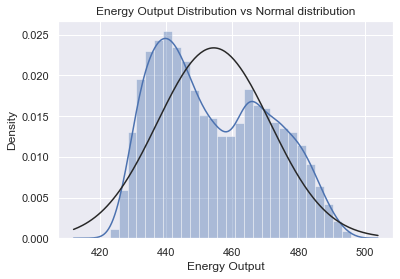

In [6]:
from scipy.stats import norm
(avge, std_dev) = norm.fit(data['PE'])
plt.figure()
sns.distplot(a = data['PE'], hist = True, kde = True, fit = norm)
plt.title('Energy Output Distribution vs Normal distribution')
plt.xlabel('Energy Output')
plt.show()

A box plot was used to check whether there are any outliers in the data.

<AxesSubplot:xlabel='PE'>

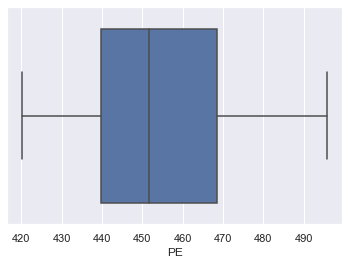

In [7]:
sns.boxplot(data['PE'], orient = 'v')

The data was visualised to explore the relationship between the independent variables and the dependent target variable using scatter plots

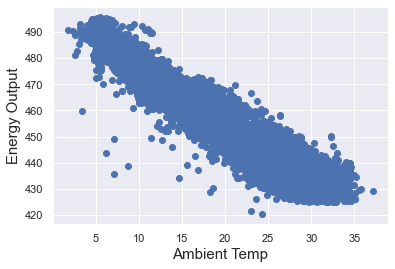

In [8]:
# Scatter plot of Ambient Temperature and Energy Output
plt.scatter(data['AT'], data['PE'])
plt.xlabel('Ambient Temp', fontsize = 15)
plt.ylabel('Energy Output', fontsize = 15)
plt.show()

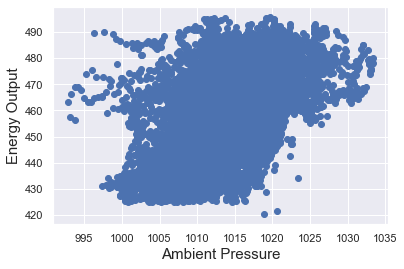

In [9]:
# Scatter plot of Ambient Pressure and Energy Output
plt.scatter(data['AP'], data['PE'])
plt.xlabel('Ambient Pressure', fontsize = 15)
plt.ylabel('Energy Output', fontsize = 15)
plt.show()

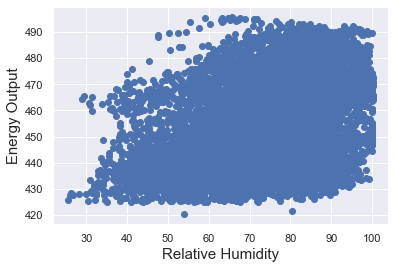

In [10]:
# Scatter plot of Relative Humidity and Energy Output
plt.scatter(data['RH'], data['PE'])
plt.xlabel('Relative Humidity', fontsize = 15)
plt.ylabel('Energy Output', fontsize = 15)
plt.show()

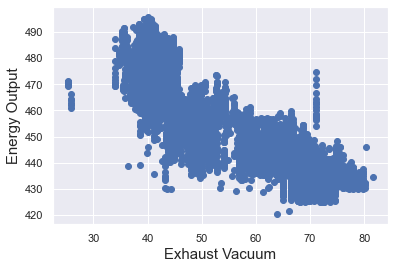

In [11]:
# Scatter plot of Exhaust Vacuum and Energy Output
plt.scatter(data['V'], data['PE'])
plt.xlabel('Exhaust Vacuum', fontsize = 15)
plt.ylabel('Energy Output', fontsize = 15)
plt.show()

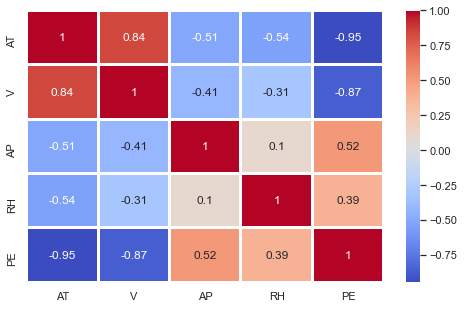

In [12]:
cor_mat = data.corr()
plt.figure(figsize = (8,5))
sns.heatmap(cor_mat, annot = True, cmap = "coolwarm", linewidth = 2)
plt.show()

It was observed from the correlation matrix that the ambient temperature and temperature were highly correlated. This is expected as the more vacuum from the gas turbine generated as possible, the greater the ambient temperature. No further transformation was performed for the two features/variables.


## Methodology

Before the data was fed into the models for testing, and evaluation, it was split into inputs and target, then split further into training and testing batches with 80% of the data used for training the model, and 20% for testing the final model. The inputs of the training and testing data were then standardised before the models could be evaluated using the data.

In [13]:
## Data split into features and target
inputs = data.drop(['PE'], axis = 1)
target = data['PE']

In [14]:
inputs.shape, target.shape

((9568, 4), (9568,))

In [15]:
inputs

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [16]:
# Split data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, random_state = 42)

In [17]:
# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Model Selection

Four models were evaluated - Multiple Linear Regression, Polynomial Regression,Support Vector Regression, and  Random Forest Regression

In [19]:
## Multiple Linear Regression
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [21]:
# Linear regression predict
y_lr_pred = lr.predict(x_train)
np.set_printoptions(precision =2)
print(np.concatenate((y_lr_pred.reshape(len(y_lr_pred), 1), y_train.values.reshape(len(y_train), 1)), 1))

[[448.44 443.31]
 [475.09 490.96]
 [478.15 483.94]
 ...
 [439.09 435.06]
 [469.58 471.13]
 [469.7  472.43]]


In [22]:
from sklearn.metrics import r2_score
sc_1 = r2_score(y_train, y_lr_pred).round(2)
sc_1

0.93

In [23]:
from sklearn.metrics import mean_squared_error
y_lr_mse = mean_squared_error(y_train, y_lr_pred)
y_lr_rmse = np.sqrt(y_lr_mse).round(2)
y_lr_rmse

4.57

In [24]:
# Polynomial Regression 

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

In [26]:
x_poly = poly.fit_transform(x_train)

In [27]:
pr = LinearRegression()
pr.fit(x_poly, y_train)

LinearRegression()

In [28]:
y_pr_pred = pr.predict(x_poly)
np.set_printoptions(precision =2)
print(np.concatenate((y_pr_pred.reshape(len(y_pr_pred), 1), y_train.values.reshape(len(y_train), 1)), 1))

[[447.73 443.31]
 [474.72 490.96]
 [479.81 483.94]
 ...
 [439.37 435.06]
 [470.38 471.13]
 [470.33 472.43]]


In [29]:
sc_2 = r2_score(y_train, y_pr_pred).round(2)
sc_2

0.94

In [30]:
y_pr_mse = mean_squared_error(y_train, y_pr_pred)
y_pr_rmse = np.sqrt(y_pr_mse).round(2)
y_pr_rmse

4.26

In [31]:
## Support Vector Regression
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(x_train, y_train)

SVR()

In [32]:
y_svr_pred = svr.predict(x_train)

In [33]:
np.set_printoptions(precision =2)
print(np.concatenate((y_svr_pred.reshape(len(y_svr_pred), 1), y_train.values.reshape(len(y_train), 1)), 1))

[[447.22 443.31]
 [475.68 490.96]
 [481.16 483.94]
 ...
 [437.41 435.06]
 [472.04 471.13]
 [469.81 472.43]]


In [34]:

sc_4 = r2_score(y_train, y_svr_pred).round(2)
sc_4

0.94

In [35]:
y_svr_mse = mean_squared_error(y_train, y_svr_pred)
y_svr_rmse = np.sqrt(y_svr_mse).round(2)
y_svr_rmse

4.15

In [36]:
## Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [37]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [38]:
y_rfr_pred = rfr.predict(x_train)

In [39]:
np.set_printoptions(precision =2)
print(np.concatenate((y_rfr_pred.reshape(len(y_rfr_pred), 1), y_train.values.reshape(len(y_train), 1)), 1))

[[444.24 443.31]
 [489.57 490.96]
 [483.11 483.94]
 ...
 [435.33 435.06]
 [469.97 471.13]
 [473.2  472.43]]


In [40]:
sc_5 = r2_score(y_train, y_rfr_pred).round(2)
sc_5

0.99

In [41]:
y_rfr_mse = mean_squared_error(y_train, y_rfr_pred)
y_rfr_rmse = np.sqrt(y_rfr_mse).round(2)
y_rfr_rmse

1.26

## Model Evaluation

The root mean squared error (RMSE) and the r2_score of the various models were the metrics used for evaluation. The results are shown in the Summary table and sorted in descending order of error.

In [42]:
Summary = pd.DataFrame()

In [43]:
Summary['Model'] = ['Linear Regression', 'Polynomial Regression', 'Support Vector', 'Random Forest']
Summary['R2'] = ([sc_1, sc_2, sc_4, sc_5])
Summary['Error'] = ([y_lr_rmse, y_pr_rmse, y_svr_rmse, y_rfr_rmse])

In [44]:
Summary.sort_values(by = ['Error'], ascending = False, inplace = True)
Summary

,Model,R2,Error
0,Linear Regression,0.93,4.57
1,Polynomial Regression,0.94,4.26
2,Support Vector,0.94,4.15
3,Random Forest,0.99,1.26


In [45]:
# Feature Importance

In [46]:
x_train_ = pd.DataFrame(x_train, columns = ['AT', 'V', 'AP','RH'])


The random forest model was chosen as the final model to be used as it had the lowest error and highest r2_score. The most important factor in the model was also observed to be the ambient temperature.


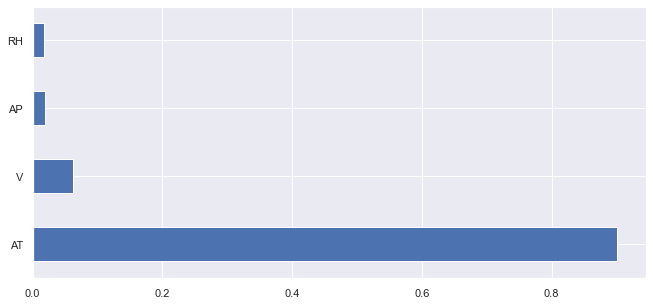

In [47]:
feat_imp = pd.Series(rfr.feature_importances_, index = x_train_.columns)
plt.figure(figsize = (11,5))
feat_imp.nlargest(10).plot(kind = "barh")
plt.show()

## Final Model Evaluation

In [48]:
## Use test data on model with highest accuracy and lowest error - Random Forest
y_hat = rfr.predict(x_test)
sc_f = r2_score(y_hat, y_test).round(2)
sc_f

0.96

In [49]:
y_hat_mse = mean_squared_error(y_test, y_hat)
y_hat_rmse = np.sqrt(y_hat_mse).round(2)
y_hat_rmse

3.24

The Random Forest Regression model was evaluated on the test data and achieved an r2_score of 0.96 and error of 3.24